<h1>SOLAR RADIATION PREDICTION USING POLYNOMIAL REGRESSION</h1>

DATASET - https://www.kaggle.com/datasets/dronio/SolarEnergy

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('solar_radiation_data.csv')
data

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [ ]:
data['TimeSunRise'] = pd.to_datetime(data['TimeSunRise'], errors = 'coerce', dayfirst = True)
data['TimeSunRise'] = pd.to_numeric(data['TimeSunRise'])

In [ ]:
data['TimeSunSet'] = pd.to_datetime(data['TimeSunSet'], errors = 'coerce', dayfirst = True)
data['TimeSunSet'] = pd.to_numeric(data['TimeSunSet'])

In [ ]:
data

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,1706681580000000000,1706724780000000000
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,1706681580000000000,1706724780000000000
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,1706681580000000000,1706724780000000000
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,1706681580000000000,1706724780000000000
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,1706681580000000000,1706724780000000000
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,1706683260000000000,1706722920000000000
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,1706683260000000000,1706722920000000000
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,1706683260000000000,1706722920000000000
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,1706683260000000000,1706722920000000000


In [ ]:
data = data.drop(['Data','Time'], axis=1)
data.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,1.21,48,30.46,59,177.39,5.62,1706681580000000000,1706724780000000000
1,1475229023,1.21,48,30.46,58,176.78,3.37,1706681580000000000,1706724780000000000
2,1475228726,1.23,48,30.46,57,158.75,3.37,1706681580000000000,1706724780000000000
3,1475228421,1.21,48,30.46,60,137.71,3.37,1706681580000000000,1706724780000000000
4,1475228124,1.17,48,30.46,62,104.95,5.62,1706681580000000000,1706724780000000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Radiation               32686 non-null  float64
 2   Temperature             32686 non-null  int64  
 3   Pressure                32686 non-null  float64
 4   Humidity                32686 non-null  int64  
 5   WindDirection(Degrees)  32686 non-null  float64
 6   Speed                   32686 non-null  float64
 7   TimeSunRise             32686 non-null  int64  
 8   TimeSunSet              32686 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 2.2 MB


In [ ]:
data[data.duplicated()].any()

UNIXTime                  False
Radiation                 False
Temperature               False
Pressure                  False
Humidity                  False
WindDirection(Degrees)    False
Speed                     False
TimeSunRise               False
TimeSunSet                False
dtype: bool

In [ ]:
data.isnull().any()

UNIXTime                  False
Radiation                 False
Temperature               False
Pressure                  False
Humidity                  False
WindDirection(Degrees)    False
Speed                     False
TimeSunRise               False
TimeSunSet                False
dtype: bool

In [ ]:
data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,3.268600e+04,3.268600e+04
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,1.706682e+18,1.706724e+18
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,9.311228e+11,9.950533e+11
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,1.706681e+18,1.706723e+18
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,1.706682e+18,1.706723e+18
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,1.706682e+18,1.706723e+18
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,1.706683e+18,1.706725e+18
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,1.706684e+18,1.706726e+18


<Axes: >

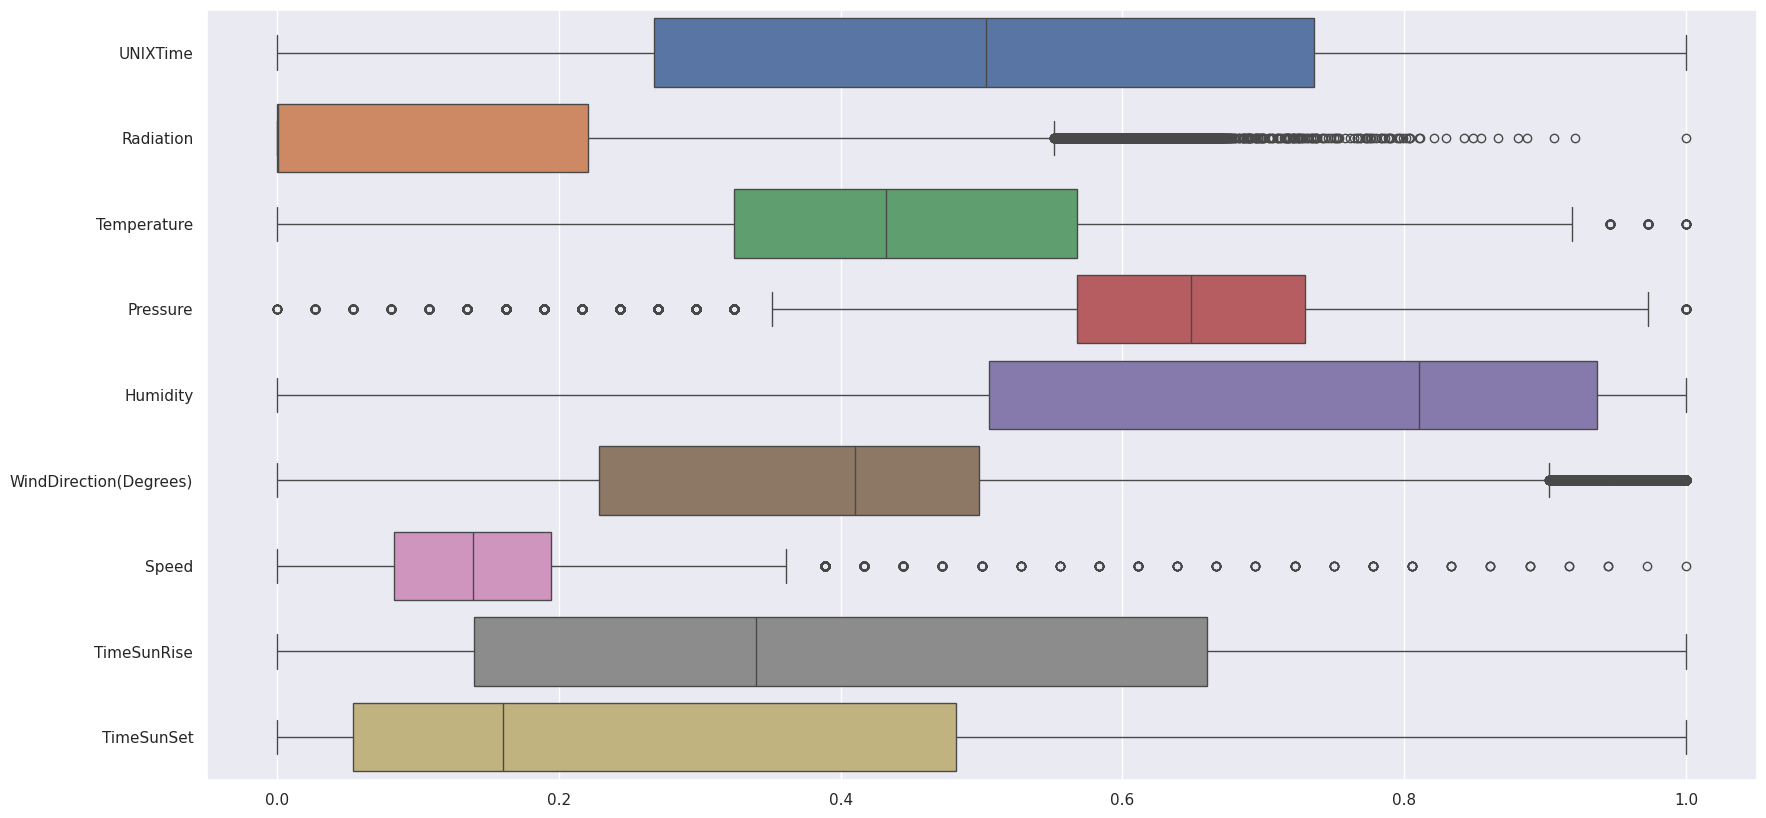

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
df = pd.DataFrame(scaled_data, columns = data.columns)

plt.figure(figsize=(20,10))
sns.set(font_scale=1)
sns.boxplot(data=df, orient='h')

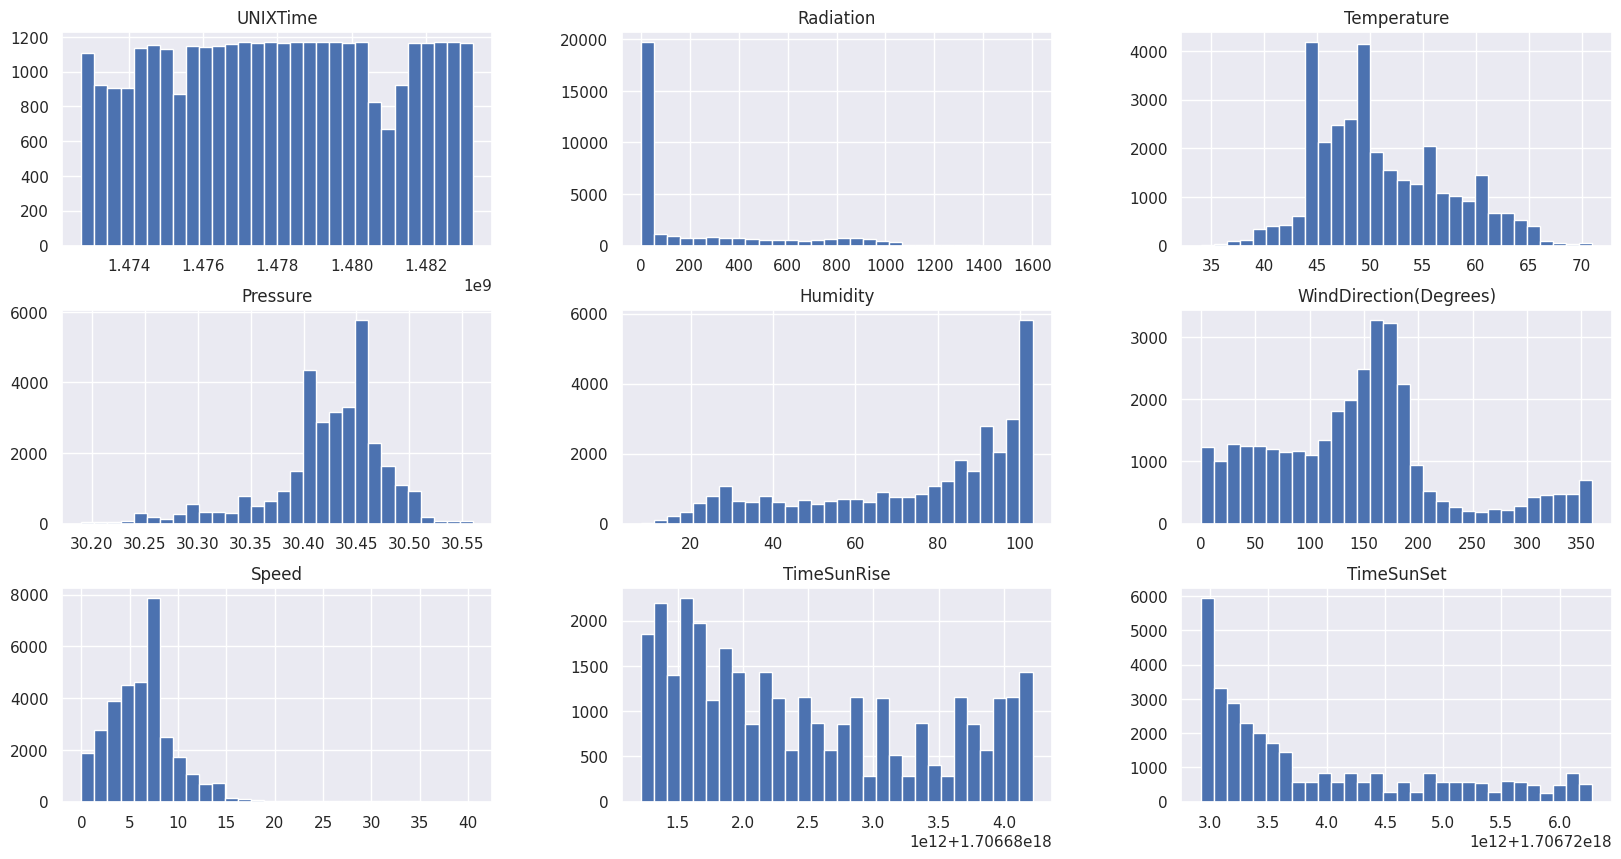

In [ ]:
data.hist(bins=30, figsize=(20,10), layout=(3,3))
plt.show()

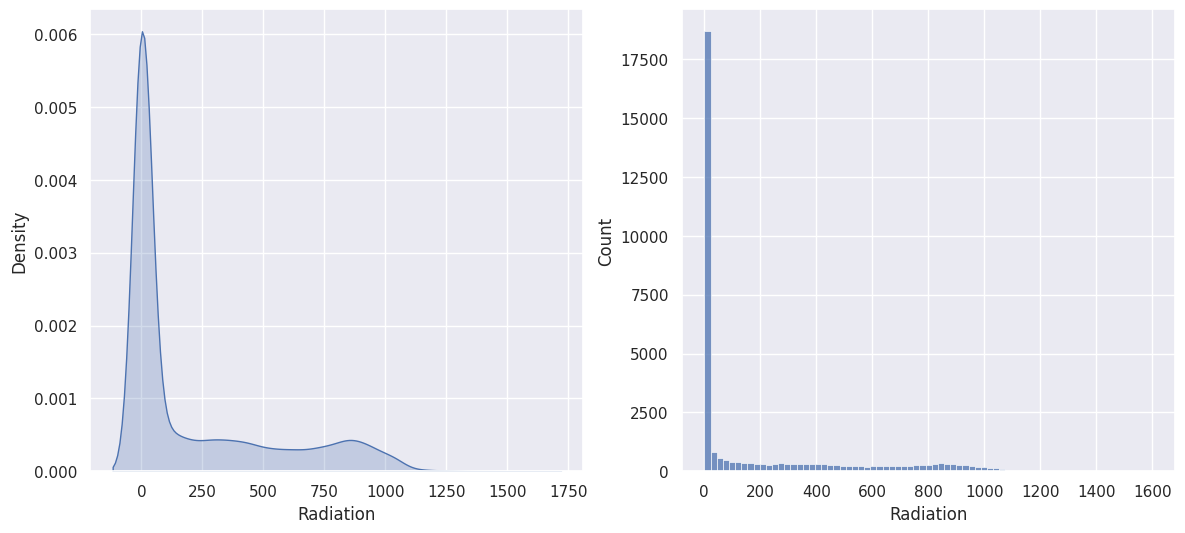

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
sns.kdeplot(data['Radiation'], label='Radiation', fill=True)

plt.subplot(1,2,2)
sns.histplot(data['Radiation'], label='Radiation', fill=True)

plt.show()

In [ ]:
data.shape

(32686, 9)

In [ ]:
Q1 = data['Radiation'].quantile(0.25)
Q3 = data['Radiation'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['Radiation'] >= lower_bound) & (data['Radiation'] <= upper_bound)]

In [ ]:
data.shape

(30721, 9)

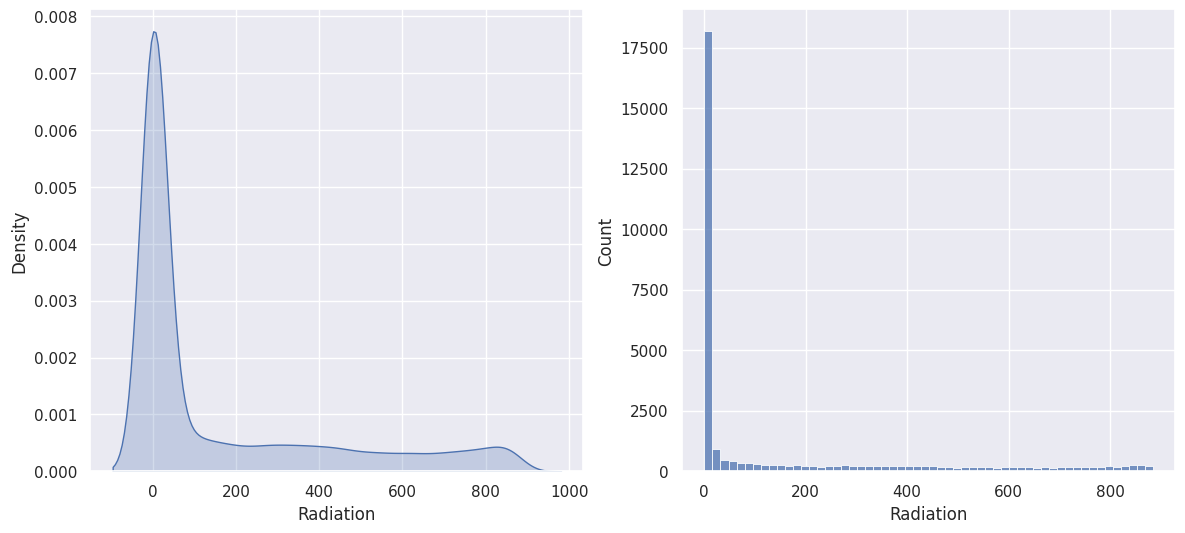

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
sns.kdeplot(data['Radiation'], label='Radiation', fill=True)

plt.subplot(1,2,2)
sns.histplot(data['Radiation'], label='Radiation', fill=True)

plt.show()

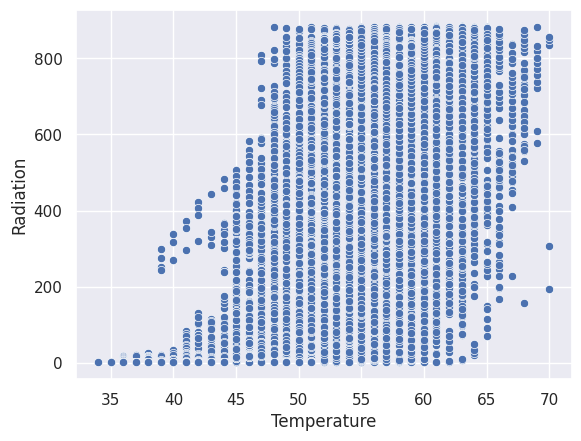

In [ ]:
sns.scatterplot(x='Temperature', y='Radiation', data=data)
plt.show()

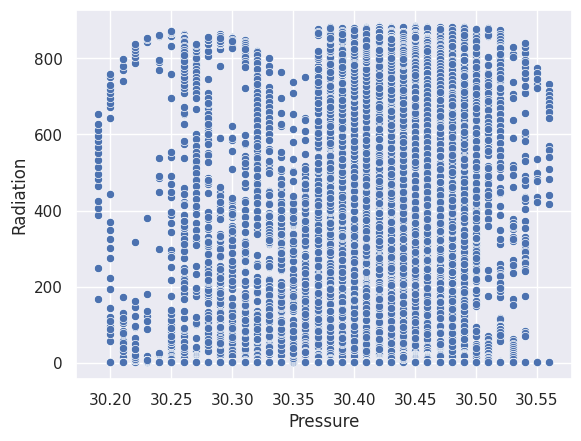

In [ ]:
sns.scatterplot(x='Pressure', y='Radiation', data=data)
plt.show()

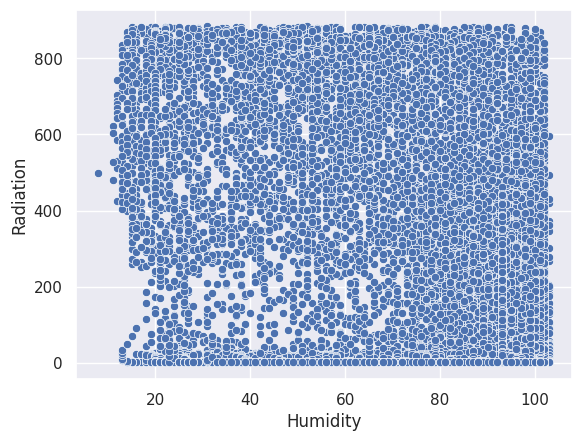

In [ ]:
sns.scatterplot(x='Humidity', y='Radiation', data=data)
plt.show()

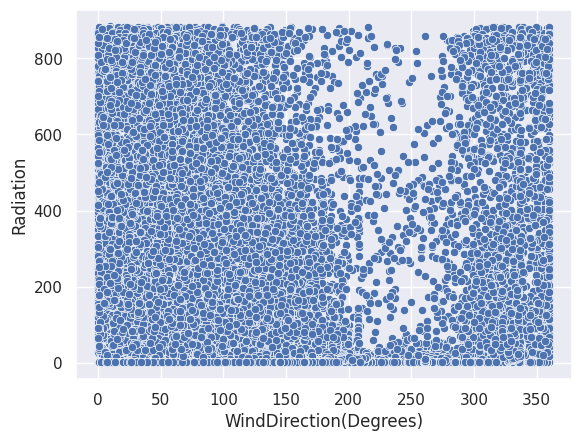

In [ ]:
sns.scatterplot(x='WindDirection(Degrees)', y='Radiation', data=data)
plt.show()

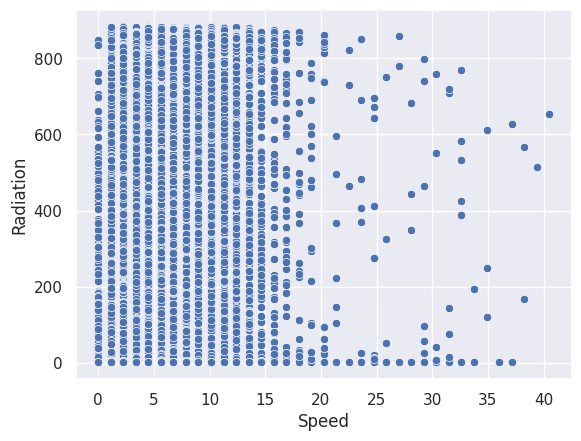

In [ ]:
sns.scatterplot(x='Speed', y='Radiation', data=data)
plt.show()

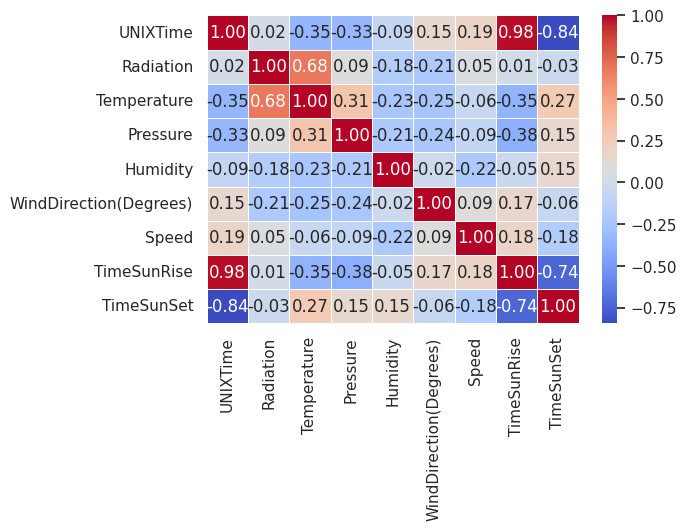

In [ ]:
correlations = data.corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
x = data.drop('Radiation', axis=1)
y = data['Radiation']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=21)

In [ ]:
x.head()

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,48,30.46,59,177.39,5.62,1706681580000000000,1706724780000000000
1,1475229023,48,30.46,58,176.78,3.37,1706681580000000000,1706724780000000000
2,1475228726,48,30.46,57,158.75,3.37,1706681580000000000,1706724780000000000
3,1475228421,48,30.46,60,137.71,3.37,1706681580000000000,1706724780000000000
4,1475228124,48,30.46,62,104.95,5.62,1706681580000000000,1706724780000000000


In [ ]:
y.head()

0    1.21
1    1.21
2    1.23
3    1.21
4    1.17
Name: Radiation, dtype: float64

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
r2_train = model.score(x_train,y_train)
r2_test = model.score(x_test,y_test)
print(f"\nThe R^2 score of the LinearRegression model on training data is : {r2_train}")
print(f"\nThe R^2 score of the LinearRegression model on testing data is : {r2_test}")


The R^2 score of the LinearRegression model on training data is : 0.5483849209134026

The R^2 score of the LinearRegression model on testing data is : 0.5460209538411812


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
PolynomialRegression = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=5)),
    ('linear_regression', LinearRegression())
])

PolynomialRegression.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures(degree=5)),
                ('linear_regression', LinearRegression())])

In [ ]:
train_r2 = PolynomialRegression.score(x_train,y_train)
test_r2 = PolynomialRegression.score(x_test,y_test)
print(f"\nThe R^2 score of the PolynomialRegression model on training data is : {train_r2}")
print(f"\nThe R^2 score of the PolynomialRegression model on testing data is : {test_r2}")


The R^2 score of the PolynomialRegression model on training data is : 0.8224318242853443

The R^2 score of the PolynomialRegression model on testing data is : 0.7985903464079486


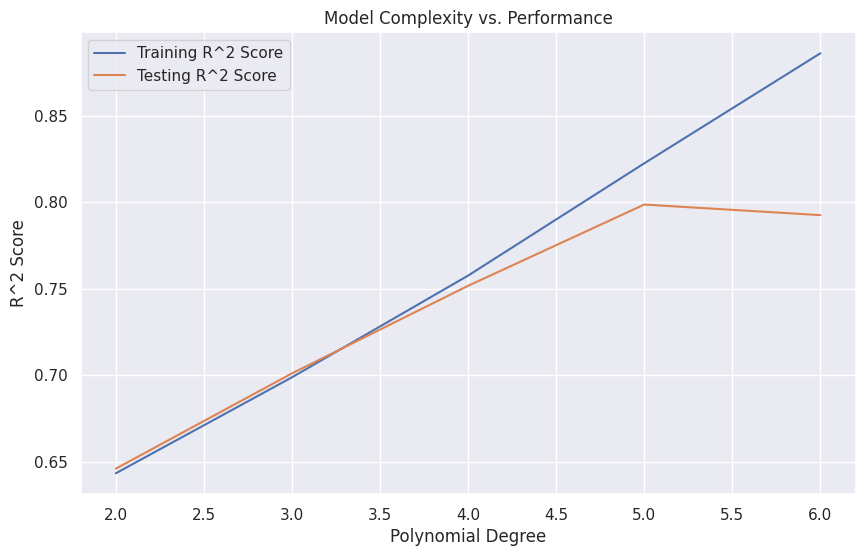

In [ ]:
from sklearn.pipeline import make_pipeline

degrees = [2, 3, 4, 5, 6]
train_r2_scores = []
test_r2_scores = []

for degree in degrees:
    model = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train, y_train)
    train_r2_scores.append(model.score(x_train, y_train))
    test_r2_scores.append(model.score(x_test, y_test))

plt.figure(figsize=(10,6))
plt.plot(degrees, train_r2_scores, label='Training R^2 Score')
plt.plot(degrees, test_r2_scores, label='Testing R^2 Score')
plt.xlabel('Polynomial Degree')
plt.ylabel('R^2 Score')
plt.title('Model Complexity vs. Performance')
plt.legend()
plt.show()

In [ ]:
training_predictions = PolynomialRegression.predict(x_train)
testing_predictions = PolynomialRegression.predict(x_test)

In [ ]:
print('Mean Absolute Error (Training) (DT):    ',mean_absolute_error(y_train, training_predictions))
print('Mean Squared Error (Training) (DT):     ',mean_squared_error(y_train, training_predictions))
print('Root Mean Squared Error (Training) (DT):',np.sqrt(mean_squared_error(y_train, training_predictions)))
print()
print('Mean Absolute Error (Testing) (DT):    ',mean_absolute_error(y_test, testing_predictions))
print('Mean Squared Error (Testing) (DT):     ',mean_squared_error(y_test, testing_predictions))
print('Root Mean Squared Error (Testing) (DT):',np.sqrt(mean_squared_error(y_test, testing_predictions)))

Mean Absolute Error (Training) (DT):     72.08645259193625
Mean Squared Error (Training) (DT):      11691.89653951545
Root Mean Squared Error (Training) (DT): 108.12907351640192

Mean Absolute Error (Testing) (DT):     75.16068768345097
Mean Squared Error (Testing) (DT):      12781.938266098592
Root Mean Squared Error (Testing) (DT): 113.05723447041588


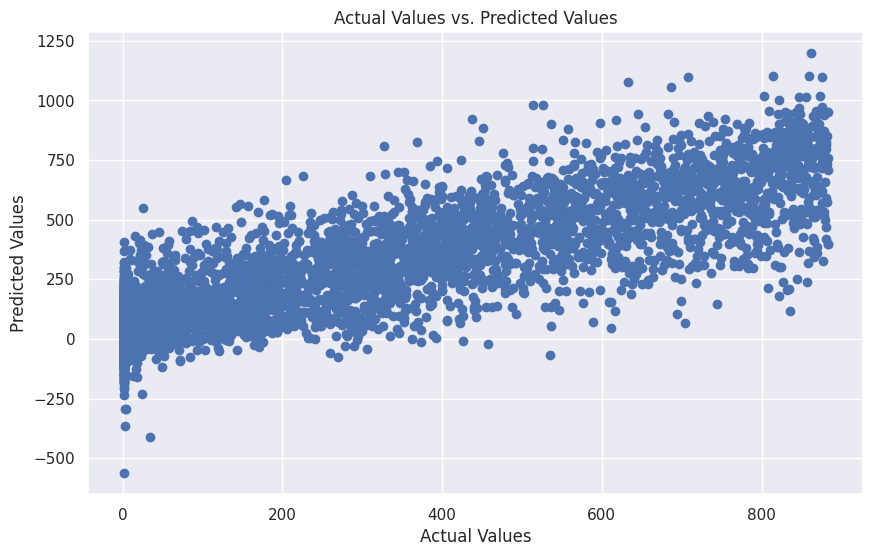

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, testing_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs. Predicted Values')
plt.show()

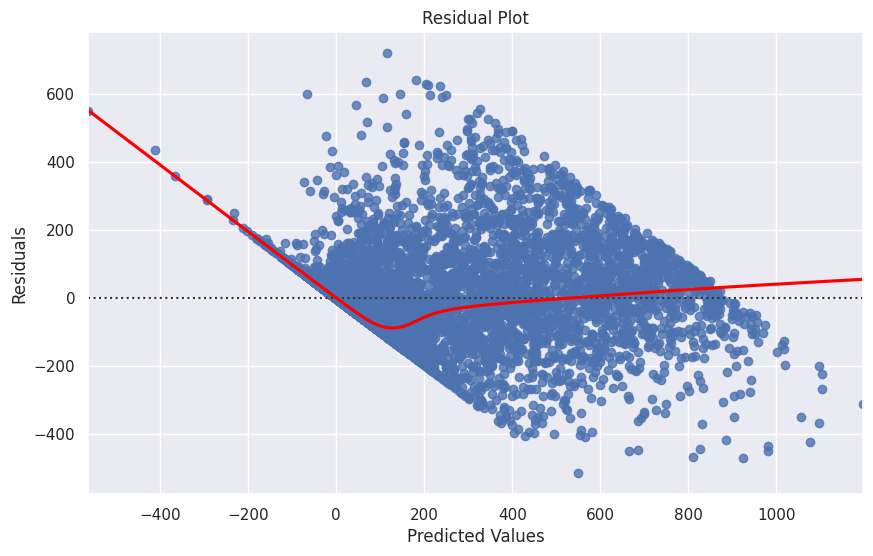

In [ ]:
residuals = y_test - testing_predictions

plt.figure(figsize=(10,6))
sns.residplot(x=testing_predictions, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

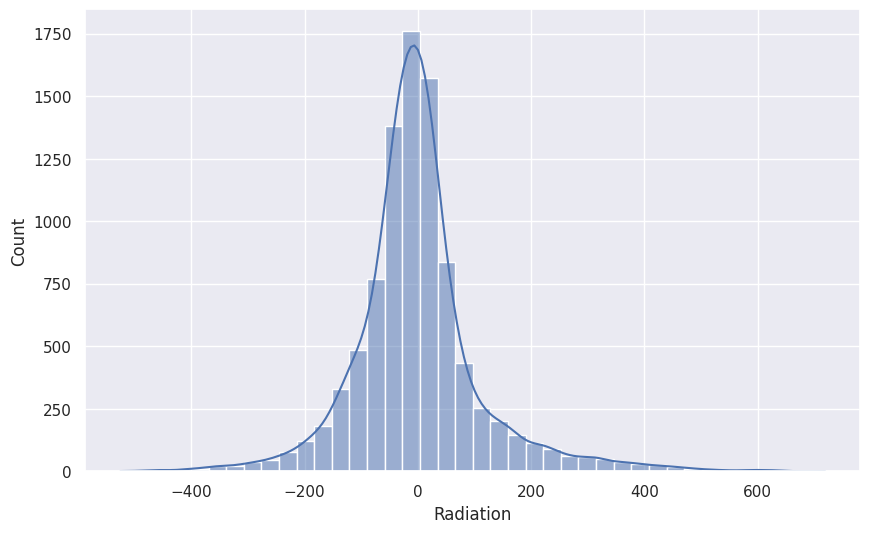

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=40, kde=True)
plt.show()

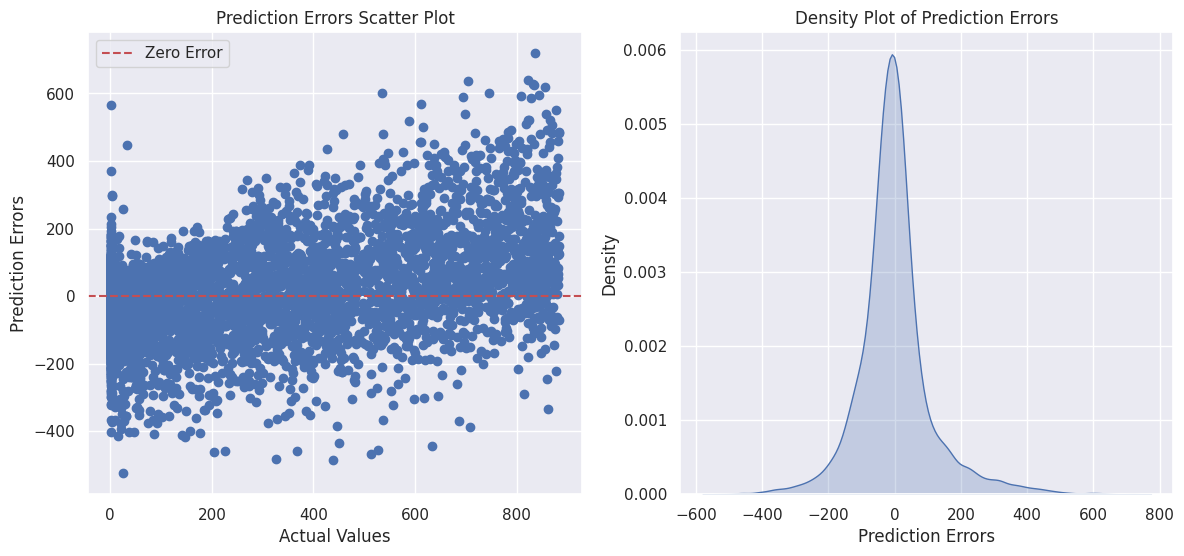

In [ ]:
errors = y_test - PolynomialRegression.predict(x_test)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(y_test, errors)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Error')
plt.xlabel('Actual Values')
plt.ylabel('Prediction Errors')
plt.title('Prediction Errors Scatter Plot')
plt.legend()

plt.subplot(1,2,2)
sns.kdeplot(errors, fill=True)
plt.xlabel('Prediction Errors')
plt.ylabel('Density')
plt.title('Density Plot of Prediction Errors')

plt.show()